In [1]:
from IPython.display import HTML

with open('./onedork.css', 'r') as file:
    custom_css = file.read()
    
custom_css = f'<style>{custom_css}</style>'
HTML(custom_css)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Libraries</p>

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Load Data</p>

In [8]:
df = pd.read_excel('../data/raw/diamonds.xlsx',sheet_name='Diamonds')
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Analyze dataset balance for the 'cut' feature</p>

In [11]:
cut_counts = df['cut'].value_counts()
print(cut_counts)

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


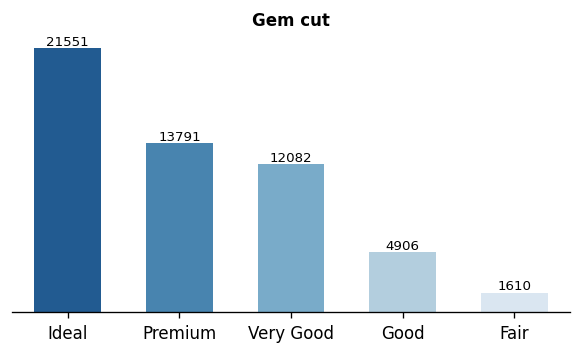

In [16]:
# List of categorical variables
category = 'cut'

# Create subplots with 2 rows and 2 columns
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=120)

# Create a count plot for the current category
s = sns.countplot(data=df, x=category, order=df[category].value_counts().index, palette='Blues_r', width=0.6, ax=ax)
    
# Set title, labels, and styling for the count plot
ax.set_title(f'Gem {category}', ha='center', fontweight='bold', fontsize=10)
ax.set_yticks([])
for container in s.containers:
    s.bar_label(container, c='black', size=8)
    s.set_ylabel('')
    s.spines['top'].set_visible(False)
    s.set_xlabel('')
    s.spines['right'].set_visible(False)
    s.spines['left'].set_visible(False)
    plt.tick_params(labelleft=False)



**Comments:**

It can be observed that the database is unbalanced for the 'cut' feature, as there is a significantly reduced number of samples for the labels 'Good' and 'Fair'. Furthermore, the 'Ideal' label holds the majority of the samples, aligning with the preliminary analysis conducted during the exploratory data analysis.

As requested in the technical test, we will now propose a systematic method to balance the dataset in terms of this feature.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Synthetic data balancing</p>

We will use the SMOTE (Synthetic Minority Over-sampling Technique) technique to address the imbalance in the dataset.

>**Justification for Choosing SMOTE:**
>
>1) In the context of imbalanced datasets, where certain classes are underrepresented compared to others, SMOTE (Synthetic Minority Over-sampling Technique) stands out as an effective technique for generating synthetic samples. This technique addresses the imbalance by creating synthetic examples for the minority class, thereby mitigating the class imbalance problem.
>
>2) The primary reasons for choosing SMOTE are as follows:
>
>3) Maintaining Diversity: SMOTE not only oversamples the minority class but also generates samples along the decision boundary, preserving the diversity within the class. This helps prevent overfitting and maintains the representativeness of the minority class.
>
>4) Addressing Overfitting: By creating synthetic samples based on the feature space distribution, SMOTE avoids direct replication of existing examples. This reduces the risk of overfitting that might occur with simpler oversampling techniques.
>
>5) Algorithmic Simplicity: SMOTE is a relatively simple and intuitive technique to implement. It involves identifying nearest neighbors and creating synthetic examples based on the interpolation of feature vectors. This simplicity makes it accessible and adaptable to various scenarios.
>
>6) Compatibility with Algorithms: The generated synthetic samples from SMOTE can be seamlessly integrated into machine learning algorithms without any modification. This makes it convenient for downstream modeling tasks.
>
>7) Effective Handling of Minority Class: SMOTE has shown promising results in addressing the class imbalance issue, leading to improved classification performance and better generalization on imbalanced datasets.
>
>8) Given the unbalanced distribution of the 'cut' feature in the dataset, using SMOTE to generate synthetic samples for the minority classes ('Fair' and 'Good') can help improve the balance of the dataset and potentially enhance the overall performance of predictive models that might be trained on it.

In [22]:
# Copy the original DataFrame
df_encoded = df.copy()

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in ['color', 'clarity']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Separate features and target
X = df_encoded.drop('cut', axis=1)
y = df_encoded['cut']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
print(y_train_resampled.value_counts())

cut
Good         17259
Very Good    17259
Premium      17259
Ideal        17259
Fair         17259
Name: count, dtype: int64


In [23]:
X_train_resampled['cut'] = y_train_resampled
X_train_resampled.head(5)

,carat,color,clarity,depth,table,price,x,y,z,cut
0,2.01,2,3,58.1,64.0,16231,8.23,8.19,4.77,Good
1,1.01,1,3,60.0,60.0,4540,6.57,6.49,3.92,Very Good
2,1.10,4,5,62.5,58.0,5729,6.59,6.54,4.10,Premium
3,1.50,1,3,61.5,65.0,6300,7.21,7.17,4.42,Good
4,1.52,3,4,62.1,57.0,12968,7.27,7.32,4.53,Very Good


Save balanced data

In [24]:
X_train_resampled.to_excel('../data/processed/diamonds_balanced.xlsx', index=False)

**Comments:**

Despite having performed class balancing using the SMOTE technique, it is crucial to validate the impact of the class imbalance in the 'cut' feature on algorithmic predictions during model training. If necessary, further balancing procedures should be considered. Additionally, exploring alternative techniques, such as undersampling or hybrid methods, might be beneficial to comprehensively address the imbalance challenge. Careful monitoring and adjustment of class balance are imperative for ensuring robust and accurate predictive modeling. This becomes especially pertinent when the balanced feature is relevant for regression tasks or represents the target label to be predicted.